# Introducción a la Detección de Comunidades

La detección de comunidades consiste en identificar grupos que se forman en la estructura de redes. Estos grupos posee una densidad bastante alta de enlaces entre ellos. Las redes sociales tienden naturalmente a tener grupos de individuos, ya sea por que comparten características similares o posee afinidad entre ellos.

In [1]:
import random
import collections
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

## 1. Zachary's Karate Club

La red social *Zachary's Karate Club* fue descrita en el artículo "An Information Flow Model for Conflict and Fission in Small Groups" (W. Zachary, 1977). Sin embargo, se ha vuelto popular debido a las comunidades que se forman en ella.

Esta red contiene la interacción de 34 miembros del club pero tomando en cuenta las actividades fuera de él. En algún punto, el administrador y el instructor entran en un conflicto. Algunos miembros del club permanecen y otros se salen de él.

In [2]:
G = nx.karate_club_graph()

In [3]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [4]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [5]:
for node in G.nodes(data = True):
    print(node)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


In [6]:
N = G.number_of_nodes()
L = G.number_of_edges()
k_avg = (float(sum(dict(G.degree()).values()))) / float(N)
d = nx.density(G)

print("Number of nodes:", N)
print("Number of edges:", L)
print("Average Degree:", round(k_avg,2))
print("Density:", round(d,2))

Number of nodes: 34
Number of edges: 78
Average Degree: 4.59
Density: 0.14


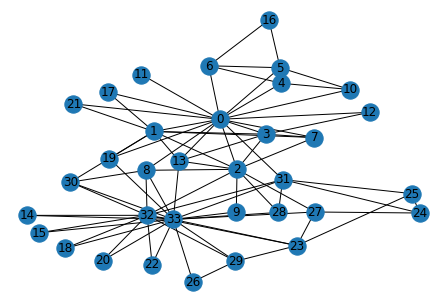

In [7]:
# Network Visualization
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos = pos, with_labels=True)

## 2. Centrality

In [8]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.bwr, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

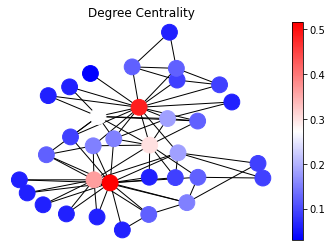

In [9]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

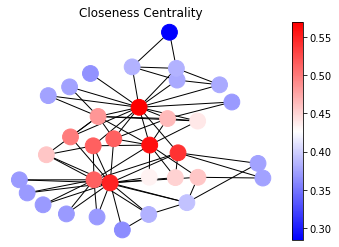

In [10]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

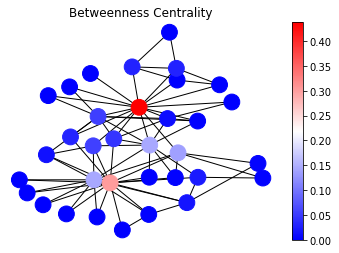

In [11]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

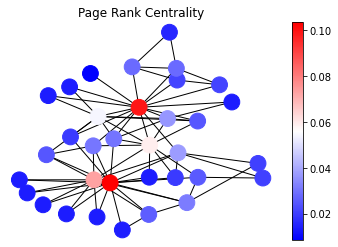

In [12]:
draw(G, pos, nx.pagerank(G, alpha=0.9), 'Page Rank Centrality')

## 3. Degree Distribution

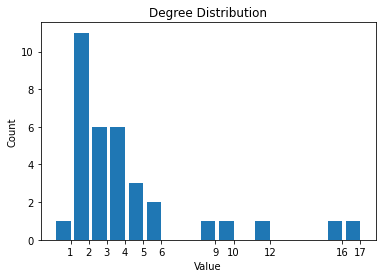

In [13]:
degree = sorted([d for n, d in G.degree()], reverse=True)

degreeCount = collections.Counter(degree)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Value")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

## 4. Network Partition and Modularity

In [14]:
# Random Partition
random_nodes = random.sample(G.nodes, 17)
random_partition = [set(random_nodes),
                    set(G.nodes) - set(random_nodes)]

print("Random Partition: \n", random_partition)

Random Partition: 
 [{32, 33, 2, 3, 6, 7, 8, 9, 12, 14, 17, 19, 20, 23, 26, 28, 31}, {0, 1, 4, 5, 10, 11, 13, 15, 16, 18, 21, 22, 24, 25, 27, 29, 30}]


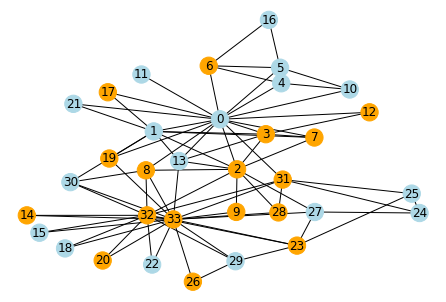

In [15]:
# Network Visualization
random_node_colors = ['orange' if node in random_nodes else 'lightblue' for node in G.nodes]

nx.draw(G, node_color=random_node_colors, pos = pos, with_labels=True)

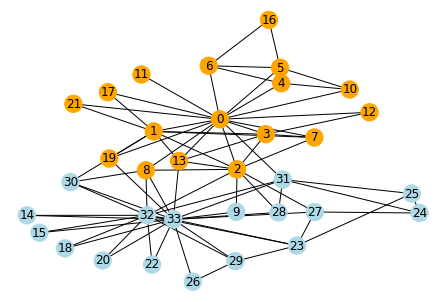

In [16]:
# Network Visualization
color_map = {'Mr. Hi': 'orange',
             'Officer': 'lightblue'}
node_colors = [color_map[G.nodes[node]['club']] for node in G.nodes]

nx.draw(G, node_color=node_colors, pos = pos, with_labels=True)

In [17]:
#Empirical Partition

empirical_groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for node in G.nodes:
    club = G.nodes[node]['club']
    empirical_groups[club].add(node)
    
empirical_partition = list(empirical_groups.values())

print("Empirical Partition: \n", empirical_partition)

Empirical Partition: 
 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


Considera una red con *N* nodos, *L* enlaces y que se ha divido en $n_C$ comunidades, cada una con $N_C$ nodos y $L_C$ enlaces. La modularidad está dada por,

$$ M =\sum_C \frac{L_C}{L}-\left( \frac{k_C}{2L} \right)^2$$

En general, para una red no dirigida y con pesos en los enlaces.,

$$ M =\sum_C \frac{W_C}{W}-\left( \frac{s_C}{2W} \right)^2$$

donde:
* $W$ es el total de los pesos de los enlaces en la red.
* $W_c$ es el total de los pesos de los nodos internos de la comunidad $C$.
* $s_c$ es el total de la fuerza (*total strength*) de los nodos de C.

In [18]:
# Modularity Function
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for group in partition:
        s_C = sum(G.degree(n, weight='weight') for n in group)
        C = G.subgraph(group)
        W_C = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_C/W - (s_C / (2 * W))**2
    
    return summation

In [19]:
print("Random Partition\n", "M_RP = ", round(modularity(G, random_partition), 5))
print("Empirical Partition\n", "M_EP = ", round(modularity(G, empirical_partition),5))

Random Partition
 M_RP =  -0.00666
Empirical Partition
 M_EP =  0.35823


NetworkX provides a function to compute efficiently the modularity:
```python
nx.community.quality.modularity(G, partition)
```

## 5. Girvan-Newman Algorithm
### A. Partition with highest Modularity

In [20]:
# Algorithm Description

G = nx.karate_club_graph()

# Compute the betweenness centrality for all links
btw_centrality = nx.edge_betweenness(G)

# Remove link with the largest betweenness centrality
most_valuable_edge = max(G.edges(), key = btw_centrality.get)
G.remove_edge(*most_valuable_edge) # *most_valueble_edge = most_valuable_edge[0], most_valuable_edge[1]

# Create Partition
partition = list(nx.connected_components(G))

In [21]:
# Girvan-Newman Algorithm

def girvan_newman(G):
    F = G.copy()
    partition_sequence = []
    for _ in range(F.number_of_edges()):
        btw_centrality = nx.edge_betweenness(F)
        most_valuable_edge = max(F.edges(), key = btw_centrality.get)
        F.remove_edge(*most_valuable_edge)
        partition = list(nx.connected_components(F))
        partition_sequence.append(partition)
        
    modularity_sequence = [modularity(G, partition) for partition in partition_sequence]
    
    return partition_sequence, modularity_sequence

In [22]:
G = nx.karate_club_graph()
partition_sequence, modularity_sequence = girvan_newman(G)

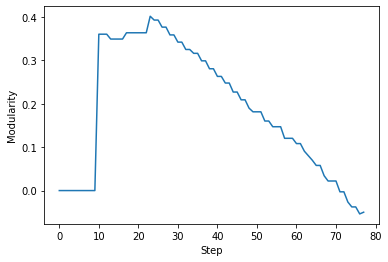

In [23]:
# Modularity Plot
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Step')
plt.show()

In [24]:
# Partition with highest modularity

best_partition, best_modularity = max(zip(partition_sequence,modularity_sequence), key=lambda x:x[1])
print("Partition with Highest Modularity")
print("Partition: ", best_partition)
print("Modularity: ", best_modularity)

Partition with Highest Modularity
Partition:  [{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]
Modularity:  0.40129848783694944


In [25]:
# Partition Map Function
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

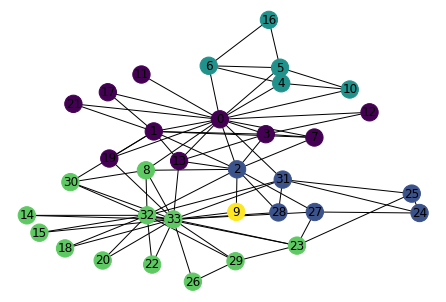

In [26]:
# Network Visualization
best_partition_map = create_partition_map(best_partition)
best_partition_node_colors = [best_partition_map[node] for node in G.nodes()]

nx.draw(G, node_color=best_partition_node_colors, pos = pos, with_labels=True)

### B. Best Partition with two communities

In [27]:
for partition in partition_sequence:
    if len(partition) == 2:
        two_communities_partition = partition
        break

In [28]:
print("Partition with two communities")
print("Partition: ", two_communities_partition)
print("Modularity: ", modularity(G, two_communities_partition))

Partition with two communities
Partition:  [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Modularity:  0.35996055226824464


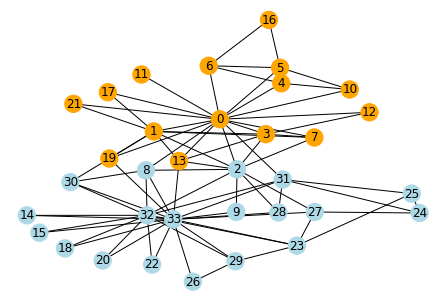

In [29]:
# Network Visualization
two_communities_partition_map = create_partition_map(two_communities_partition)
two_communities_partition_node_colors = ['orange' if two_communities_partition_map[node]==0 else 'lightblue' for node in G.nodes()]
nx.draw(G, node_color=two_communities_partition_node_colors, pos = pos, with_labels=True)

### C. Final Comparisson

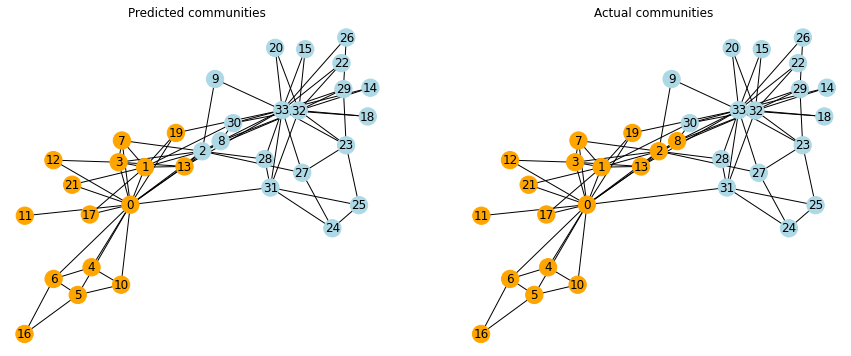

In [30]:
pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
two_communities_partition_map = create_partition_map(two_communities_partition)
two_communities_partition_node_colors = ['orange' if two_communities_partition_map[node]==0 else 'lightblue' for node in G.nodes()]
nx.draw(G, node_color=two_communities_partition_node_colors, pos = pos, with_labels=True)
plt.title('Predicted communities')

plt.subplot(1, 2, 2)
empirical_color_map = {'Mr. Hi': 'orange',
             'Officer': 'lightblue'}
empirical_node_colors = [empirical_color_map[G.nodes[node]['club']] for node in G.nodes]

nx.draw(G, node_color=empirical_node_colors, pos = pos, with_labels=True)
plt.title('Actual communities')
plt.show()

NetworkX proporciona una función para obtener los elementos de cada comunidad utilizando el algoritmo *Girvan-Newmann*.
    
```python
nx.community.girvan_newman(G)
```

## References

Esta notebook esta basada en:

[1]  F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science. Chapter 6 Tutorial: [Link](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%206%20Tutorial.ipynb).

[2] C. Güney (2017). Network Centrality Measures and Their Visualization: [Link](https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html).